# Préparation Patient Test BraTS

In [1]:
##### Importation des différents modules ########

import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
from sklearn.preprocessing import StandardScaler
import random as rd

In [2]:
##### DEFINITION DU PATH ######
TRAIN_DATASET_PATH = '/Users/bimlaboratoire/python/stage_mzoughebi/notebook/PYTHON/archive/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_001/'
###### Chargement d'une image TEST FLAIR size (240 240 155)######
test_image_flair= nib.load(TRAIN_DATASET_PATH+'BraTS20_Validation_001_flair.nii').get_fdata()

In [3]:
###### On importe la fonction de Standardisation Z-score ########
scaler=StandardScaler()
########## On affiche les caractéristiques avant modification ##########
print('maximum sans rescale : ' + str(test_image_flair.max()))
############ Nécessite de Rescale les values ########

# Obligé de rescale sur des volumes 1D d'ou on décompose en 1D puis on recompose en 3D
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

#On vérifie les modifications éffectuées 
print('maximum avec rescale : ' + str(test_image_flair.max()))

# Affichage des statistiques après la standardisation
print('moyenne: ' + str(test_image_flair.mean()))
print('écart type : ' + str(test_image_flair.std()))


maximum sans rescale : 872.0
maximum avec rescale : 130.00601011693755
moyenne: -7.869451804654873e-17
écart type : 0.9503819266230386


In [4]:
####### Dans le cas d'un modèle à deux canal on applique cela que sur T1-weighted contrasté en plus ######
test_image_t1ce= nib.load(TRAIN_DATASET_PATH+'BraTS20_Validation_001_t1ce.nii').get_fdata()
test_image_t1ce = scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

In [5]:
### On combine en une image multichanel 
### Cela nous permet d'empiler les tableau selon la dimension anotée par axis ici 3
combined_x= np.stack([test_image_flair,test_image_t1ce], axis=3)

In [6]:
### On concatenate les volumes vide
#On concatene en une taille divisible par 64 pour pouvoir ajouter le patch
#On obtient des images multi chanel en 128*128*128*2
combined_x=combined_x[56:184,56:184,13:141] 


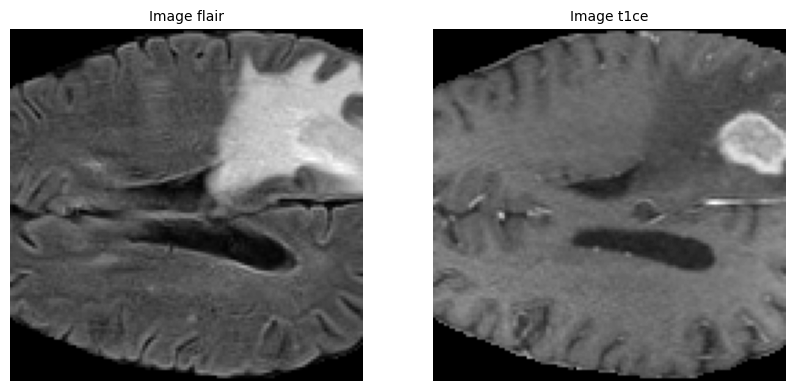

74


In [7]:
# On est obligé d'afficher une autre slice pour eviter un index out of range
n_slice = rd.randint(0, test_image_flair.shape[2])
#Nécessaireement cela ne sera plus la meme slice exactement

# Création d'une figure avec 2 ligne et 3 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de l'image flair
axs[0].imshow(combined_x[:,:,n_slice, 0], cmap='gray')
axs[0].axis('off')
axs[0].set_title("Image flair" ,fontsize=10)

# Affichage de l'image T1-WEIGHTED
axs[1].imshow(combined_x[:,:,n_slice, 1], cmap='gray')
axs[1].axis('off')
axs[1].set_title("Image t1ce", fontsize=10)




# Affichage du tableau avec les deux cellules
plt.show()
print(n_slice)

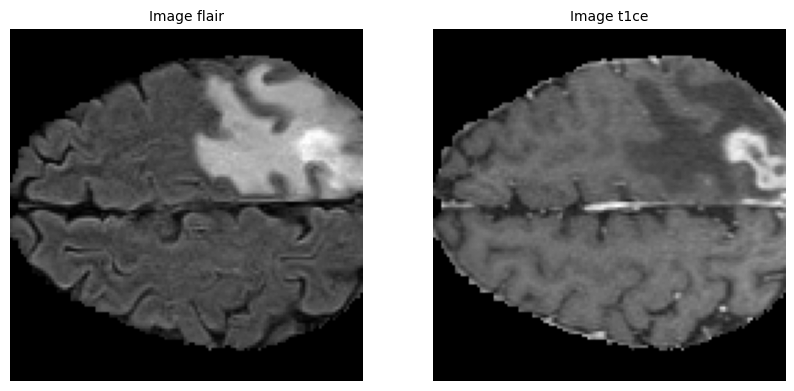

99


In [8]:
np.save('/Users/bimlaboratoire/python/stage_mzoughebi/notebook/PYTHON/DataBase_IA/input_128/test_brats.npy', combined_x) #So its not an image better  in numpy array
########## On vérifie que l'on arrive à les réouvrir à l'identique ######################
combined_x=np.load('/Users/bimlaboratoire/python/stage_mzoughebi/notebook/PYTHON/DataBase_IA/input_128/test_brats.npy')

# On est obligé d'afficher une autre slice pour eviter un index out of range
n_slice = 99
#Nécessaireement cela ne sera plus la meme slice exactement

# Création d'une figure avec 2 ligne et 3 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de l'image flair
axs[0].imshow(combined_x[:,:,n_slice, 0], cmap='gray')
axs[0].axis('off')
axs[0].set_title("Image flair" ,fontsize=10)

# Affichage de l'image T1-WEIGHTED
axs[1].imshow(combined_x[:,:,n_slice, 1], cmap='gray')
axs[1].axis('off')
axs[1].set_title("Image t1ce", fontsize=10)

# Affichage du tableau avec les deux cellules
plt.show()
print(n_slice)
